In [1]:
import graphistry
import pandas as pd
import os
from collections import Counter
from importlib import reload

import warnings
warnings.filterwarnings('ignore')

In [2]:
graphistry.register(api=3, protocol="https", server="hub.graphistry.com", username="silkspace", password="yqQg02&N") 

In [3]:
from graphistry.ai_utils import *
from graphistry.feature_utils import *

from data import get_amazon_dataframe

import umap.plot

In [4]:
ndf, edf = get_amazon_dataframe()

[__init__.py:18 - get_amazon_dataframe() ] Loading Amazon Data


In [5]:
ndf = ndf.fillna('').astype(str)

In [6]:
edf = edf.fillna('').astype(str)

In [7]:
rev_edf = edf[edf.revenue_pct!=''] # only a few of these

In [8]:
rev_edf

,to,reln,rel_type_desc,revenue_pct,scr_tier,title,full_name,entity_proper_name,entity_type,address_id,longitude,latitude,from
115,05HF3F-E,Customer,Customer,1.9,2.0,,,,,,,,05HRGQ-E
144,007SJT-E,Customer,Customer,0.6,2.0,,,,,,,,001Q08-E
176,0FPWZZ-E,Customer,Customer,1.6,2.0,,,,,,,,00D81S-E
193,000YMS-E,Customer,Customer,4.5,2.0,,,,,,,,000BPP-E
206,05LL2F-E,Customer,Customer,29.0,2.0,,,,,,,,00FBM5-E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,000LNN-E,Customer,Customer,10.0,2.0,,,,,,,,000N01-E
9704,000DS6-E,Customer,Customer,12.0,2.0,,,,,,,,005V34-E
9711,0B999H-E,Customer,Customer,100.0,2.0,,,,,,,,0CY7JS-E
9713,069J8N-E,Customer,Customer,16.0,2.0,,,,,,,,001FR9-E


In [9]:
src, dst = 'to', 'from'
good_edge_cols = ['to', 'from', 'reln', 'entity_type']

In [10]:
edf = edf[edf.reln!='location']#[good_edge_cols]

In [11]:
edf

,to,reln,rel_type_desc,revenue_pct,scr_tier,title,full_name,entity_proper_name,entity_type,address_id,longitude,latitude,from
0,000YWC-E,parent,,,,,,,,,,,0C9SR9-E
1,001MF1-E,parent,,,,,,,,,,,0FQKC6-E
2,001MF1-E,parent,,,,,,,,,,,09B2DQ-E
3,000YWC-E,parent,,,,,,,,,,,0C9VBD-E
4,001MF1-E,parent,,,,,,,,,,,000YWC-E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17853,07F21Z-E,employee,,,,"Chairman, President & Chief Executive Officer",Xiao Long Li,,,,,,0B70TD-E
17854,05V18Q-E,employee,,,,Chief Executive & Financial Officer,Stefan A. Baustert,,,,,,05J4QL-E
17855,07KHRS-E,employee,,,,Executive Director,Stephen Lloyd,,,,,,006LH5-E
17856,05YWL7-E,employee,,,,General Partner,Peter H. Fenton,,,,,,076WRN-E


In [12]:
node = 'node'

good_node_cols = ['title', 'entity_type', 'iso_country', 'kind']

good_node_cols_lat_long = good_node_cols + ['latitude', 'longitude']

In [13]:
# remove countries
ndf = ndf[ndf.kind!='iso_country']

In [14]:
g = FeatureMixin()

In [15]:
g2 = g.nodes(ndf, node).edges(edf, src, dst)

In [16]:
g2.plot()

In [43]:
g3 = g2.featurize(kind='nodes', use_columns=good_node_cols)

[feature_utils.py:93 - remove_node_column_from_ndf_and_return_ndf_from_res() ] removing node column `node` so we do not featurize it
[feature_utils.py:414 - get_dataframe_columns() ] returning DataFrame with columns `['title', 'entity_type', 'iso_country', 'kind']`
[feature_utils.py:187 -  get_textual_columns() ] No Textual Columns were found
[feature_utils.py:274 - process_dirty_dataframes() ] Encoding might take a few minutes --------
[feature_utils.py:281 - process_dirty_dataframes() ] -Fitting SuperVectorizer on DATA took 1.89 minutes

[feature_utils.py:288 - process_dirty_dataframes() ] -Shape of data (23679, 109)

[feature_utils.py:289 - process_dirty_dataframes() ] -Transformers: [('low_card_cat', OneHotEncoder(), ['entity_type', 'kind']), ('high_card_cat', GapEncoder(n_components=42), ['title', 'iso_country'])]

[feature_utils.py:290 - process_dirty_dataframes() ] -Transformed Columns: ['entity_type_', 'entity_type_COL', 'entity_type_COR', 'entity_type_ESP', 'entity_type_EXT', 

In [ ]:
# Now we can UMAP it

In [44]:
g4 = g3.umap(kind='nodes', scale = 1.9)

[feature_utils.py:526 - _featurize_or_get_nodes_data_if_X_is_None() ] Found Node features in `res`
[feature_utils.py:538 - _featurize_or_get_nodes_data_if_X_is_None() ] Fetching `node_target` in `res`. Target is type <class 'NoneType'>
[umap_utils.py:53 -                  fit() ] Starting UMAP-ing data of shape (23679, 109)
[umap_utils.py:68 -      _edge_influence() ] Calculating weighted adjacency (edge) DataFrame
[umap_utils.py:58 -                  fit() ] -UMAP-ing took 0.30 minutes total
[umap_utils.py:59 -                  fit() ]  - or 79258.45 rows per minute
[feature_utils.py:390 - prune_weighted_edges_df() ] Pruning weighted edge DataFrame from 425780 to 46932 edges


In [45]:
g4.plot()

In [20]:
g5 = g2.featurize(kind='edges')

[feature_utils.py:333 - process_edge_dataframes() ] Encoding Edges using MultiLabelBinarizer
[feature_utils.py:336 - process_edge_dataframes() ] -Shape of Edge encoder (17858, 10518)
[feature_utils.py:339 - process_edge_dataframes() ] -Rest of DataFrame has columns: Index(['reln', 'rel_type_desc', 'revenue_pct', 'scr_tier', 'title',
       'full_name', 'entity_proper_name', 'entity_type', 'address_id',
       'longitude', 'latitude'],
      dtype='object') and is empty: False
[feature_utils.py:187 -  get_textual_columns() ] No Textual Columns were found
[feature_utils.py:274 - process_dirty_dataframes() ] Encoding might take a few minutes --------
[feature_utils.py:281 - process_dirty_dataframes() ] -Fitting SuperVectorizer on DATA took 1.02 minutes

[feature_utils.py:288 - process_dirty_dataframes() ] -Shape of data (17858, 164)

[feature_utils.py:289 - process_dirty_dataframes() ] -Transformers: [('low_card_cat', OneHotEncoder(), ['reln', 'rel_type_desc', 'scr_tier', 'entity_proper_n

In [21]:
g5.edge_features.mean(0)

000BG2-E                                          0.014968
000BGZ-E                                          0.007483
000BHL-E                                          0.034312
000BJ4-E                                          0.010583
000BJT-E                                          0.055582
                                                    ...   
full_name: masayoshi, washington, ramachandran    1.033725
full_name: masayoshi, washington, ramachandran    1.033725
full_name: masayoshi, washington, ramachandran    1.033725
full_name: maffei, gregory, gregor                1.033725
full_name: maffei, gregory, gregor                1.033725
Length: 10682, dtype: float64

In [22]:
g5.plot()

In [23]:
g6 = g5.umap(kind='edges', scale=2.2, n_neighbors=22)

[umap_utils.py:53 -                  fit() ] Starting UMAP-ing data of shape (17858, 10682)
OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[umap_utils.py:68 -      _edge_influence() ] Calculating weighted adjacency (edge) DataFrame
[umap_utils.py:58 -                  fit() ] -UMAP-ing took 4.78 minutes total
[umap_utils.py:59 -                  fit() ]  - or 3738.21 rows per minute
[feature_utils.py:390 - prune_weighted_edges_df() ] Pruning weighted edge DataFrame from 716608 to 46492 edges


In [24]:
g6.edge_embedding.shape

(17858, 2)

In [37]:
edf['n'] = range(len(edf))
edf = edf.astype(str)

In [38]:
g7 = g.nodes(edf, 'n').featurize(use_columns=good_edge_cols)

[feature_utils.py:93 - remove_node_column_from_ndf_and_return_ndf_from_res() ] removing node column `n` so we do not featurize it
[feature_utils.py:414 - get_dataframe_columns() ] returning DataFrame with columns `['to', 'from', 'reln', 'entity_proper_name', 'entity_type']`
[feature_utils.py:187 -  get_textual_columns() ] No Textual Columns were found
[feature_utils.py:274 - process_dirty_dataframes() ] Encoding might take a few minutes --------
[feature_utils.py:281 - process_dirty_dataframes() ] -Fitting SuperVectorizer on DATA took 1.42 minutes

[feature_utils.py:288 - process_dirty_dataframes() ] -Shape of data (17858, 102)

[feature_utils.py:289 - process_dirty_dataframes() ] -Transformers: [('low_card_cat', OneHotEncoder(), ['reln', 'entity_proper_name', 'entity_type']), ('high_card_cat', GapEncoder(n_components=42), ['to', 'from'])]

[feature_utils.py:290 - process_dirty_dataframes() ] -Transformed Columns: ['reln_Competitor', 'reln_Customer', 'reln_Partner - Distribution', 'rel

In [41]:
g8=g7.umap()

[feature_utils.py:526 - _featurize_or_get_nodes_data_if_X_is_None() ] Found Node features in `res`
[feature_utils.py:538 - _featurize_or_get_nodes_data_if_X_is_None() ] Fetching `node_target` in `res`. Target is type <class 'NoneType'>
[umap_utils.py:53 -                  fit() ] Starting UMAP-ing data of shape (17858, 102)
[umap_utils.py:68 -      _edge_influence() ] Calculating weighted adjacency (edge) DataFrame
[umap_utils.py:58 -                  fit() ] -UMAP-ing took 0.23 minutes total
[umap_utils.py:59 -                  fit() ]  - or 77555.90 rows per minute
[feature_utils.py:390 - prune_weighted_edges_df() ] Pruning weighted edge DataFrame from 244880 to 0 edges


In [42]:
g8.plot()

<AxesSubplot:>

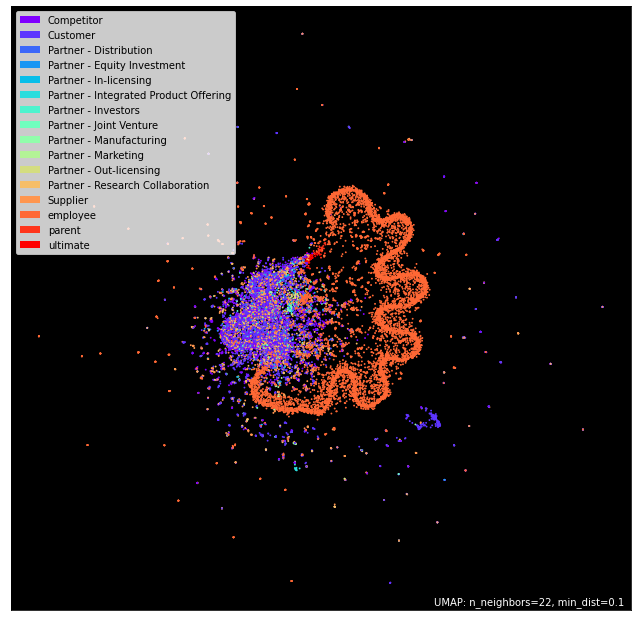

In [25]:
umap.plot.points(g6, theme='fire', labels=edf.reln)

In [26]:
p = umap.plot.interactive(g6, labels=edf.reln, hover_data=ndf[good_node_cols], point_size=20, theme='fire')
umap.plot.show(p)  

In [27]:
g6.edge_features.shape


(17858, 10682)

In [28]:
wedf = g6.weighted_edges_df_from_edges

In [29]:
wedf

,_src,_dst,weight
0,0,4,1.000000
30,1,3593,0.941621
31,1,4148,1.000000
49,2,3593,0.943784
51,2,4148,1.000000
...,...,...,...
716525,17854,970,1.000000
716554,17855,4148,1.000000
716585,17856,10424,1.000000
716586,17856,15799,0.998644
